<a href="https://colab.research.google.com/github/rich-hyun/machine_learning_military/blob/main/%EC%9D%BC%EC%B0%A8%EB%B3%84/day4_1_guess_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving project_proof2.xlsx to project_proof2 (30).xlsx


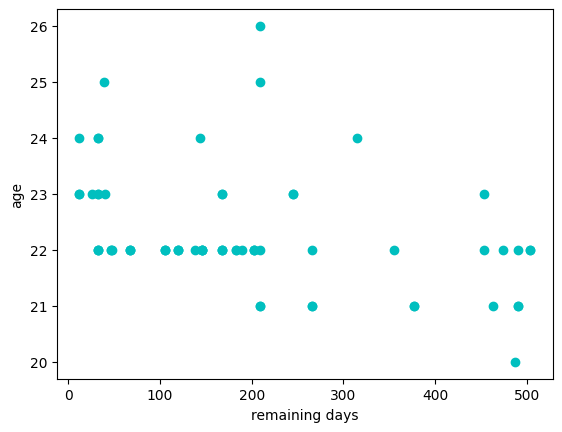

(49, 1) (17, 1)
0.3048407643312111
0.6705882352941169
0.1164181398923908
0.22790161414296706


In [33]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
workbook=pd.read_excel('project_proof2.xlsx')
base=workbook.to_numpy()

import matplotlib.pyplot as plt

"""넘파이로 데이터 준비하기"""
age=[]
for k in range(66):
  age.append(base[k][1])
rdays=[]
for k in range(66):
  rdays.append(base[k][3])

age2=np.array(age)
rdays2=np.array(rdays)

base_data=[[l,w] for l,w in zip(age,rdays)]
base_target=[1]*52+[0]*14


import numpy as np
import matplotlib.pyplot as plt
plt.scatter(base[:,[1]],base[:,[3]],color='c')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(
    age2,rdays,stratify=base_target,random_state=42)

train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

"""# k-최근접 이웃 회귀 모델을 훈련합니다"""
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))

from sklearn.metrics import mean_absolute_error
#테스트 세트에 대한 예측을 만듭니다
test_prediction=knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae=mean_absolute_error(test_target,test_prediction)
print(mae)
print(knr.score(train_input,train_target))

#이웃의 개수를 3으로 설정합니다
knr.n_neighbors=3

#모델을 다시 훈련합니다
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))